In [1]:
from qiskit import IBMQ

In [ ]:
pip install qiskit-ibmq-provider

In [17]:
IBMQ.save_account("4e92c47c8a760cf72322257c22d4c7519341d0390d39fd26e1663b9514bdd199f88f86c67c8fa4d8248c3ba2ff835e26796c9534d570bd8f6a74b2b4bb2e3ba7")

configrc.store_credentials:WARNING:2023-12-30 15:47:18,515: Credentials already present. Set overwrite=True to overwrite.


In [18]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
Aer.backends() #to display simulators available

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [22]:
provider=IBMQ.get_provider("ibm-q")

In [23]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [24]:
# to decide which simulator to use from the above list, considering qbits available in that simulator
for backend in provider.backends():
    print(backend.properties()) # Not getting a proper required outputs

None
None
None
None
None


In [25]:
for backend in provider.backends():
    try:
        qubit_count=len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name()}: {backend.status().pending_jobs} & {qubit_count}")
    # less number of pending jobs and appropriate number of qubits then that simulator is good for our work

ibmq_qasm_simulator: 0 & simulated
simulator_statevector: 0 & simulated
simulator_mps: 0 & simulated
simulator_extended_stabilizer: 0 & simulated
simulator_stabilizer: 0 & simulated
ibm_brisbane: 19 & 127
ibm_kyoto: 12 & 127
ibm_osaka: 16 & 127


In [ ]:
# Choosing ibm_kyoto

In [26]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-12-30 15:48:09,800: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [27]:
provider=IBMQ.get_provider("ibm-q")

In [28]:
quantum_comp= provider.get_backend("ibm_kyoto")

C:\Users\aniru\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


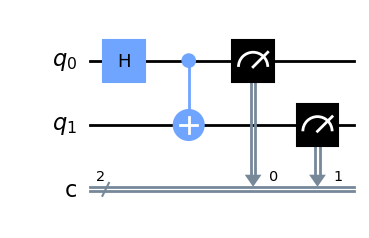

In [29]:
from qiskit import *
circuit=QuantumCircuit(2,2)
%matplotlib inline
circuit.h(0) 
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [30]:
import qiskit.tools.jupyter
%qiskit_job_watcher
job= execute(circuit,backend=quantum_comp)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [31]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


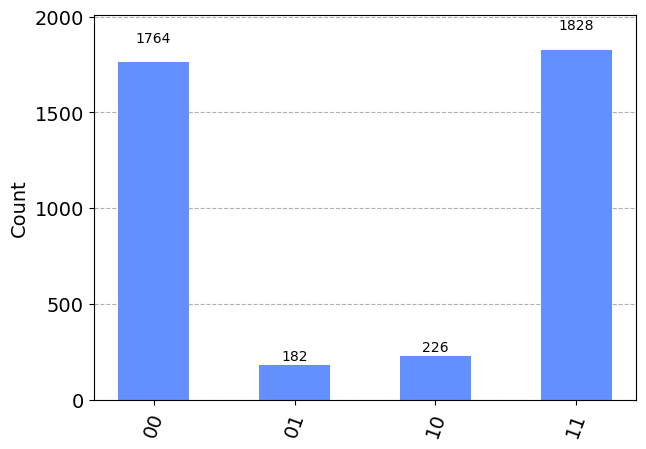

In [33]:
from qiskit.visualization import plot_histogram
quantum_result=job.result()
plot_histogram(quantum_result.get_counts(circuit))